In [1]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set_context(rc={"font.family":"sans","font.size":24,"axes.titlesize":24,"axes.labelsize":24})

# model building package
import sklearn

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('lemmatized_wHM_full.csv')

In [3]:
df = df[df['lemmatized'].notna()]

In [4]:
df['lemmatized'] = df['lemmatized'].str.lower()

In [5]:
tweets = df[df['lemmatized'].str.contains('marcjacobs')]
tweets['lemmatized'] = tweets['lemmatized'].apply(lambda x : x.replace('marcjacobs', ''))
tweets.head()

,Unnamed: 0,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,withheld_copyright,withheld_scope,...,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at,mentions,hashtags,is_retweet,clean_text,lemmatized
7964,7964,1225496887723282433,1581016201,2020-02-06 19:10:01,theWiShi,Two of our favorite shows last season were tom...,none,0.0,NaN,NaN,...,289,1189,38,NaN,2011-10-20 03:13:05,marcjacobsintl,NYFW,False,Two of our orite shows last season were tomoko...,orite show last season tomokoizumi intl nyfw b...
12685,12685,1225585146050568194,1581037243,2020-02-07 01:00:43,CheriStories,#JanelleMonae in #MarcJacobs Spring 2020 at th...,none,0.0,NaN,NaN,...,1123,1417,85,NaN,2011-01-14 01:27:02,NaN,JanelleMonae; MarcJacobs; Essence; BlackWomenI...,False,JanelleMonae in MarcJacobs Spring 2020 at the ...,janellemonae spring essence blackwomeninholly...
21310,21310,1225728483713835008,1581071418,2020-02-07 10:30:18,pandoradress,MARC BY MARC-JACOBS - Pandora Price: £89 #marc...,none,0.0,NaN,NaN,...,1155,2,14,NaN,2012-02-10 11:06:30,NaN,marcbymarcjacobs; pandoradressagency; fashion;...,False,MARC BY MARC-JACOBS - Pandora Price: £89 marcb...,marc marc- jacobs pandora price marcby pandora...
56350,56350,1226329570464477184,1581214728,2020-02-09 02:18:48,monsieurmoda,@givenchy @themarcjacobs #Givenchy #CraigMcdea...,none,0.0,NaN,NaN,...,4988,5365,94,NaN,2012-11-27 01:46:25,givenchy; themarcjacobs,Givenchy; CraigMcdean; fashion; FashionPhotogr...,False,givenchy themarcjacobs Givenchy CraigMcdean fa...,givenchy themarcjacob givenchy craigmcdean fas...
111090,111090,1227036630621442048,1581383304,2020-02-11 01:08:24,CheriStories,#LiliReinhart in #MarcJacobs Spring 2020 at th...,none,0.0,NaN,NaN,...,1123,1417,85,NaN,2011-01-14 01:27:02,NaN,LiliReinhart; MarcJacobs; VanityFair; Oscars; ...,False,LiliReinha in MarcJacobs Spring 2020 at the 20...,lilireinha spring vanityfair oscars pay more ...


# We can now proceed with the proper LDA 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=10, lowercase=True)

# apply transformation
tf = vectorizer.fit_transform(tweets['lemmatized']) #.toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names[:-1]

['af',
 'agdlm',
 'attend',
 'aw2020',
 'backstage',
 'bella',
 'bellahadid',
 'big',
 'check',
 'city',
 'coat',
 'collection',
 'come',
 'cyrus',
 'darn',
 'debut',
 'designer',
 'dress',
 'défilé',
 'eat',
 'end',
 'even',
 'fall',
 'fashion',
 'fashionista',
 'fashionshow',
 'fashionweek',
 'february',
 'finally',
 'fw20',
 'fw2020',
 'gentleman',
 'get',
 'gettin',
 'good',
 'gorgeous',
 'hacer',
 'hadid',
 'happen',
 'here',
 'how',
 'husband',
 'imgoriginals',
 'instafashion',
 'instagood',
 'instapic',
 'intl',
 'jacobs',
 'just',
 'kaiagerber',
 'karlie',
 'karliekloss',
 'kenneth',
 'kloss',
 'lady',
 'look',
 'make',
 'marc',
 'marcjacob',
 'miley',
 'mileycyrus',
 'minaj',
 'moda',
 'model',
 'naturally',
 'need',
 'new',
 'newyork',
 'newyorkfashionweek',
 'nicki',
 'nickiminaj',
 'ny',
 'nyc',
 'nyfashionweek',
 'nyfw2020',
 'officially',
 'on',
 'other',
 'outnow',
 'petty',
 'photooftheday',
 'queen',
 'rap',
 'runway',
 'show',
 'slay',
 'sorpresa',
 'star',
 'struttin

In [7]:
# Helper function to plot the most common words 
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

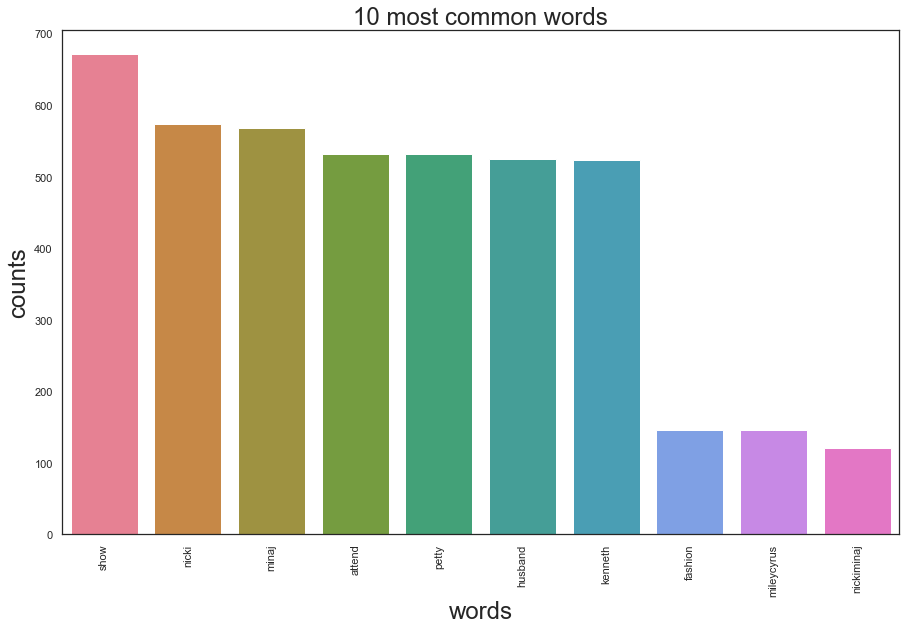

In [8]:
plot_10_most_common_words(tf,vectorizer)

## Fit LDA model
We start by trying with a model with 5 topics.
- `n_components`: number of topics = 3
- `learning_decay`: which controls the learning rate = 0.9.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 4
learning_decay = 0.9
random_state = 1234

model = LatentDirichletAllocation(n_components=number_of_topics,n_jobs = -1, evaluate_every = -1, 
                                  random_state=random_state, learning_decay=learning_decay) # random state for reproducibility

In [10]:
lda_output = model.fit_transform(tf)

### Diagnose model performance with perplexity and log-likelihood

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good.

In [11]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -24852.47271328851
Perplexity:  27.619725405890815
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.9, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 4, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 1234, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [12]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words, array):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        array.append([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [13]:
print("Topics found via LDA:")
number_of_words = 20
array = []
print_topics(model, vectorizer, number_of_words, array)

Topics found via LDA:

Topic #0:
marc jacobs runway mileycyrus fashion make york debut new officially gorgeous af look show fw20 week intl newyorkfashionweek miley fall

Topic #1:
nicki minaj attend petty show husband kenneth look queen eat lady rap gentleman yikespay how fashion valider défilé dress zoo

Topic #2:
show mileycyrus marcjacob fashion model nyfw2020 style miley intl moda get fall fw20 cyrus collection fw2020 just winter dress check

Topic #3:
nickiminaj just on gettin other happen try slay naturally need even way show designer end think good big finally darn


In [14]:
from pyLDAvis import gensim as ldavis_gensim
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os 

LDAvis_prepared = sklearn_lda.prepare(model, tf, vectorizer)

pyLDAvis.display(LDAvis_prepared)

We can save the model so not to have to generate it again

In [15]:
pyLDAvis.save_html(LDAvis_prepared, './marcJacobs'+ str(number_of_topics) +'.html')

In [16]:
df = pd.DataFrame(columns=['topic','word'])

In [17]:
for i in range(len(array)):
    for j in range(len(array[i])):
        df = df.append({'topic' : i+1, 'word' : array[i][j]}, ignore_index=True)

In [18]:
df.to_csv('topic_word_marc_jacobs.csv')